<a href="https://colab.research.google.com/github/Siam-Capsule/capsule_financial/blob/main/Capsule_Resort_Financial_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

,Product,exw_price,shipping_cost,piling_cost,total_cost
0,VL_E8,1260000,170000.0,150000,1580000.0
1,VL_D8,2527000,211000.0,150000,2888000.0
2,VL_E6,1800000,170000.0,100000,2070000.0
3,VL_A2_5_8,411000,170000.0,100000,681000.0
4,VL_A2_8_5,550000,170000.0,100000,820000.0
5,VL_A2_11_5,680000,170000.0,150000,1000000.0
6,VL_A1_5_8,386000,41000.0,100000,527000.0
7,VL_A1_8_5,520000,41000.0,100000,661000.0
8,VL_A1_11_5,654000,41000.0,150000,845000.0
9,VL_N1,272000,20500.0,0,292500.0


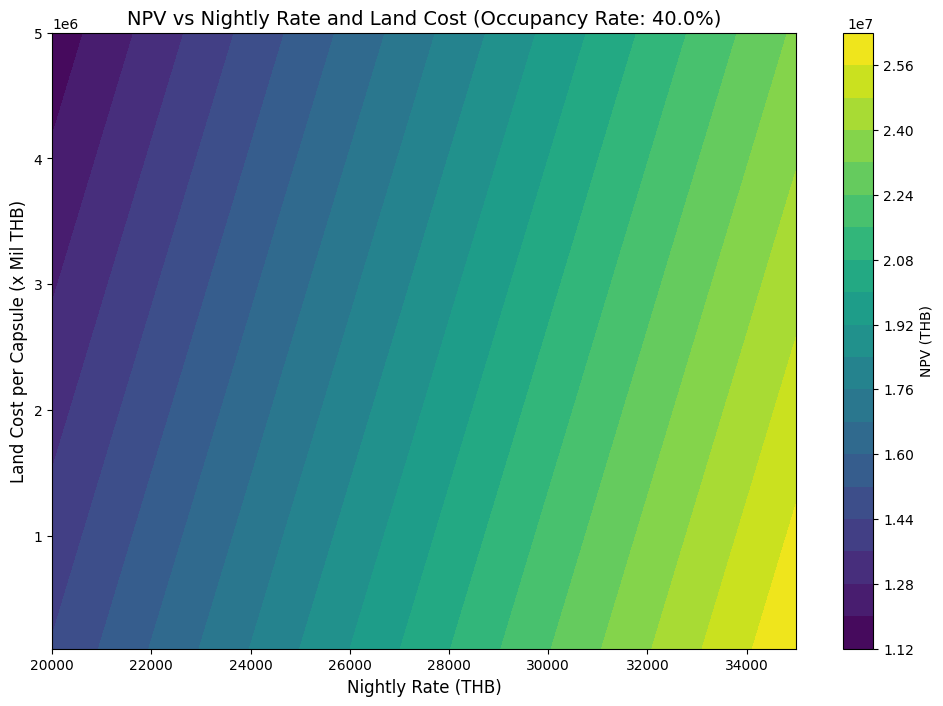

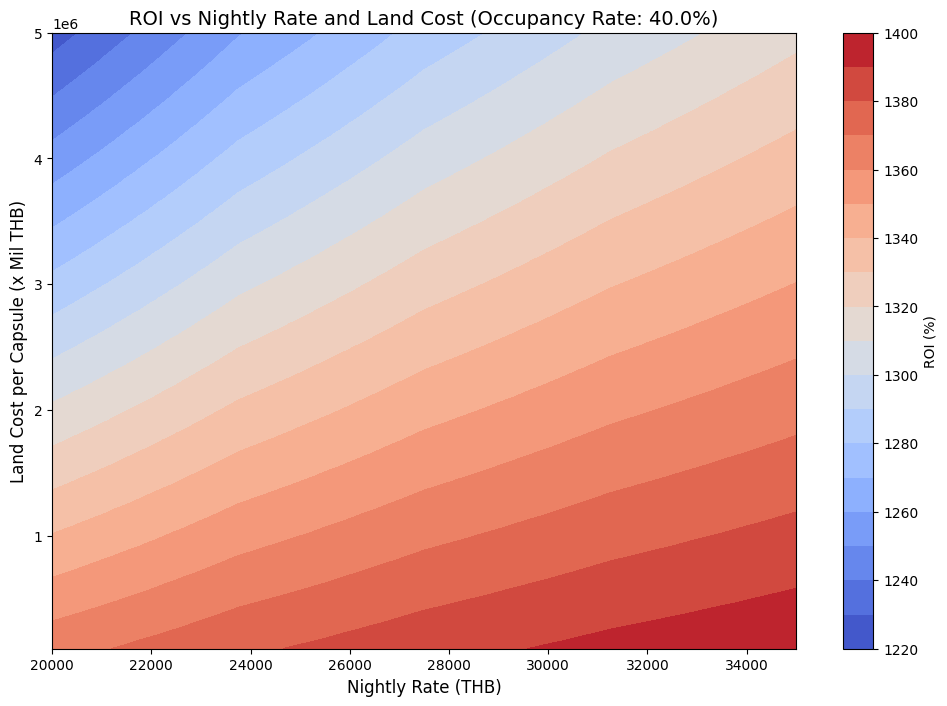

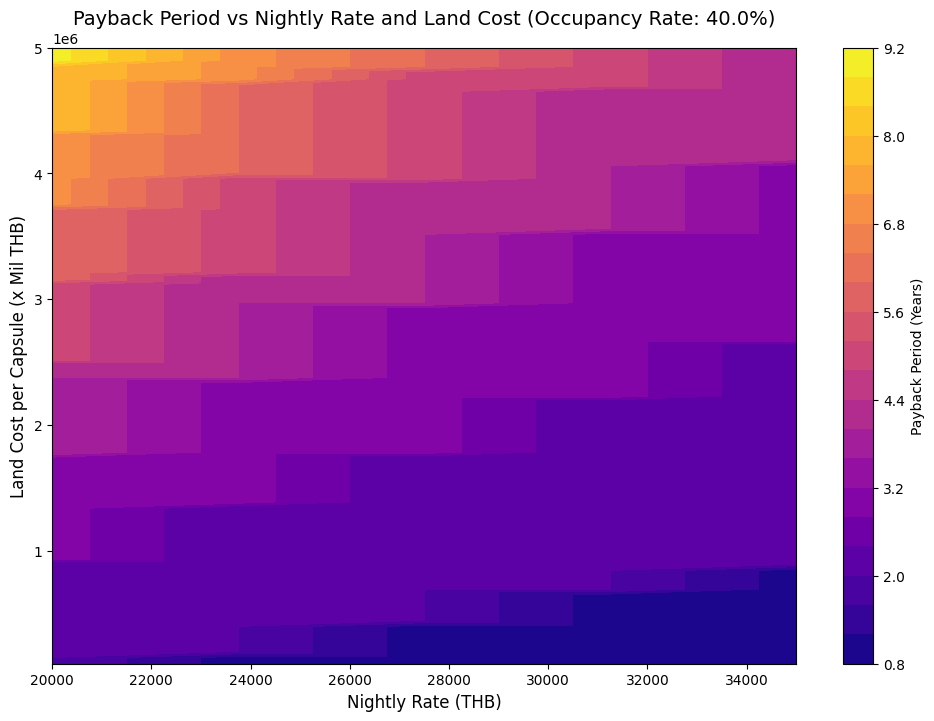

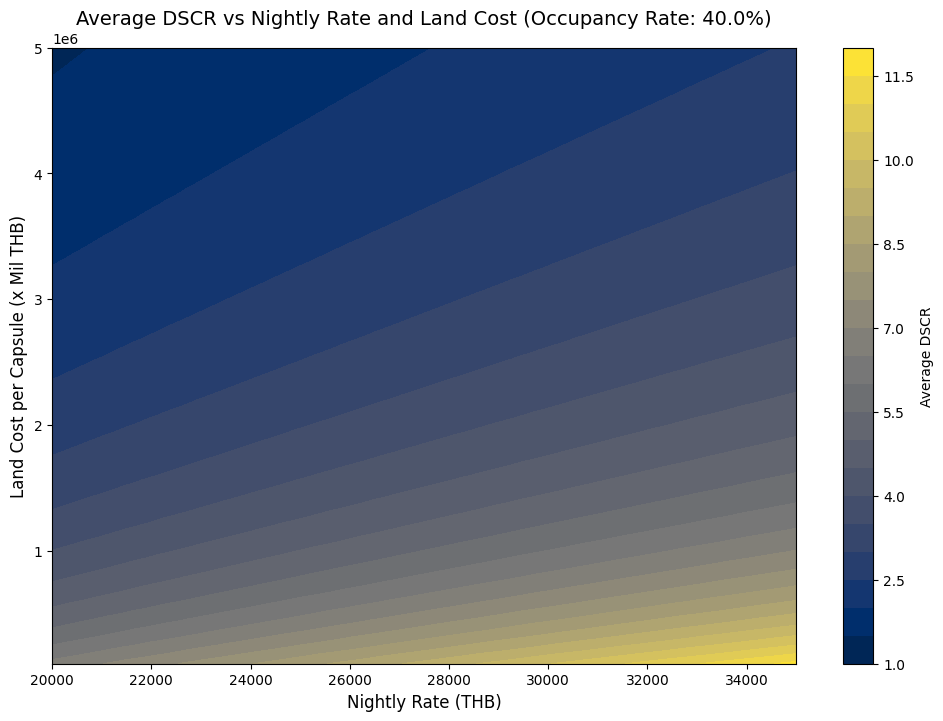

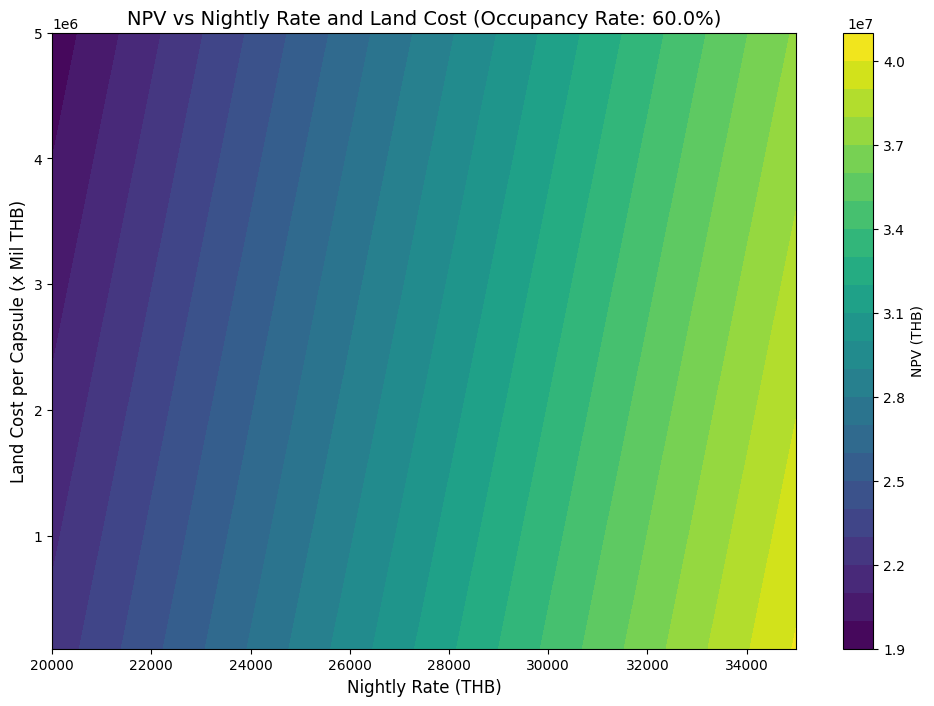

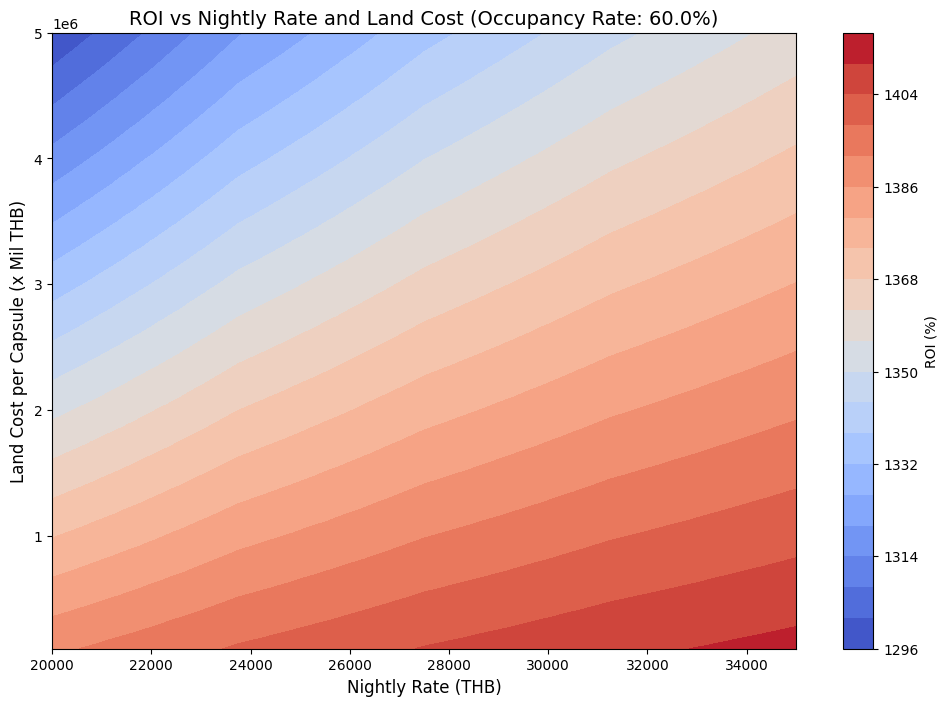

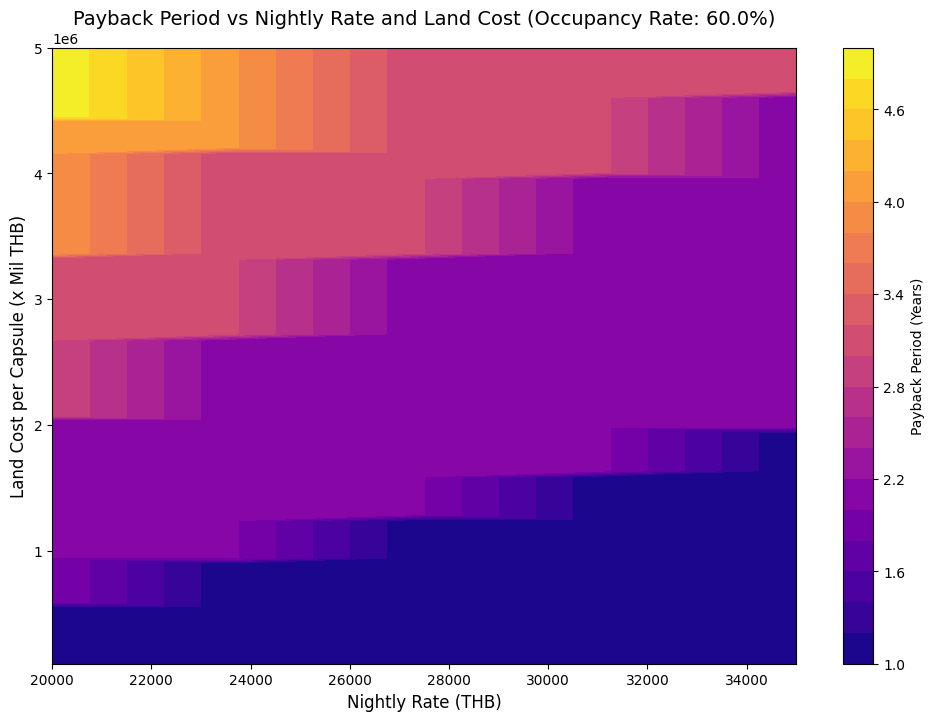

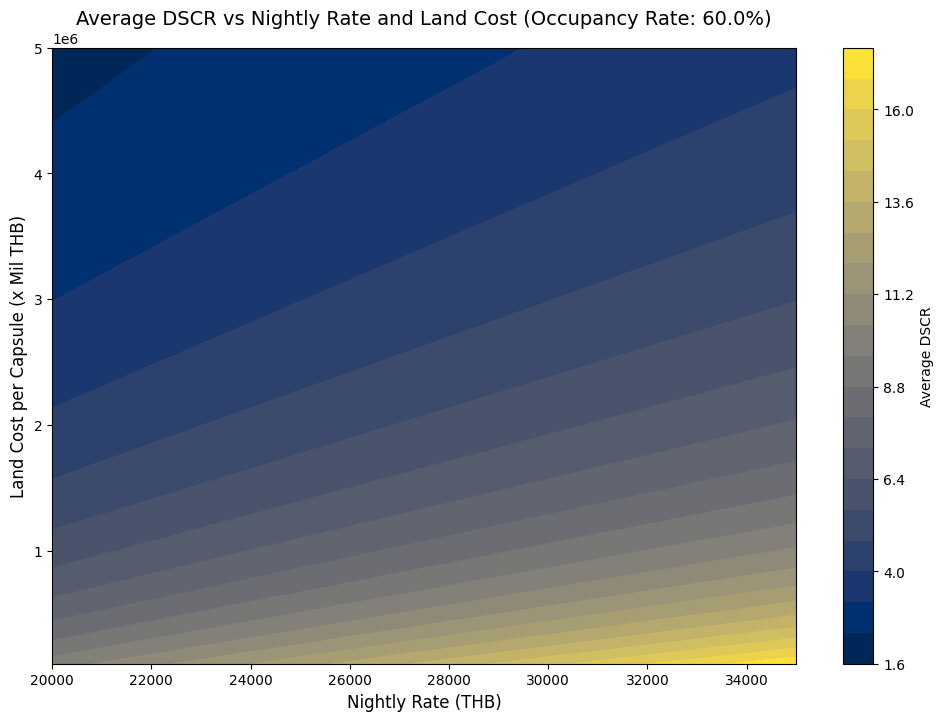

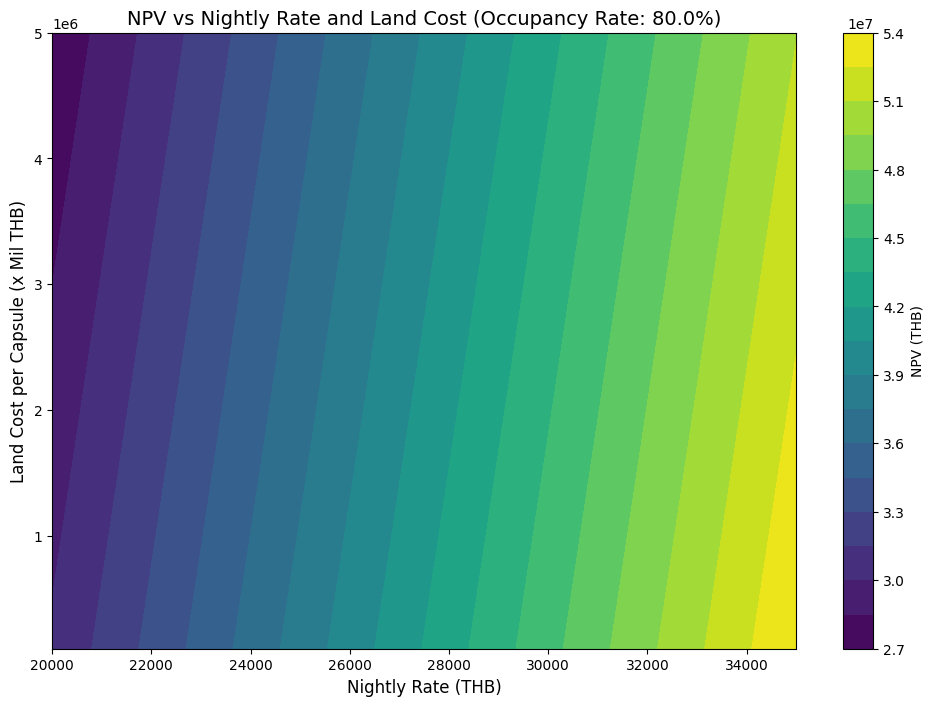

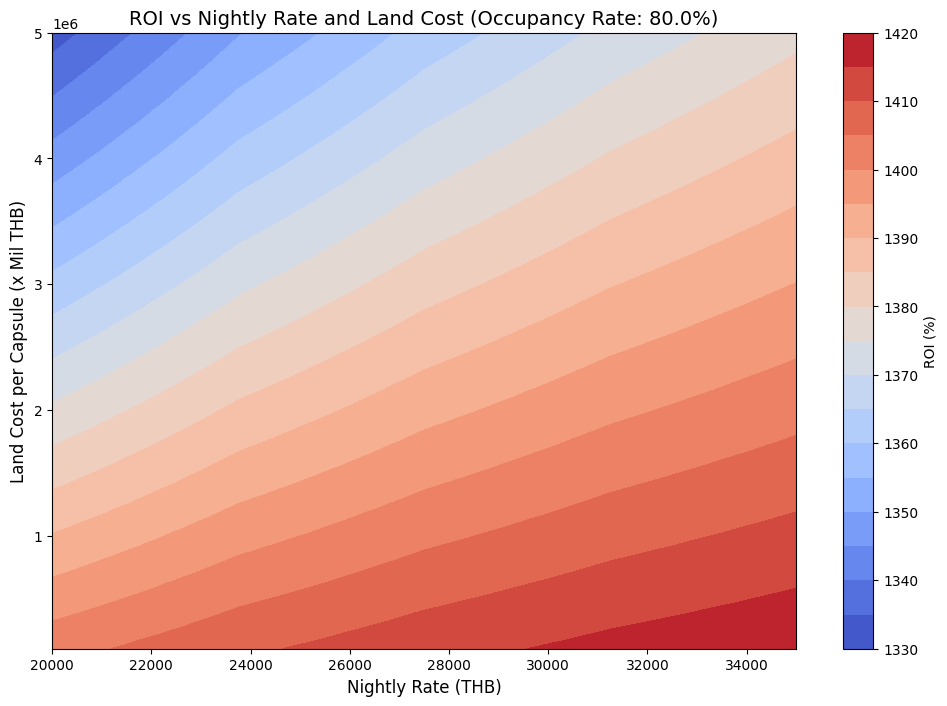

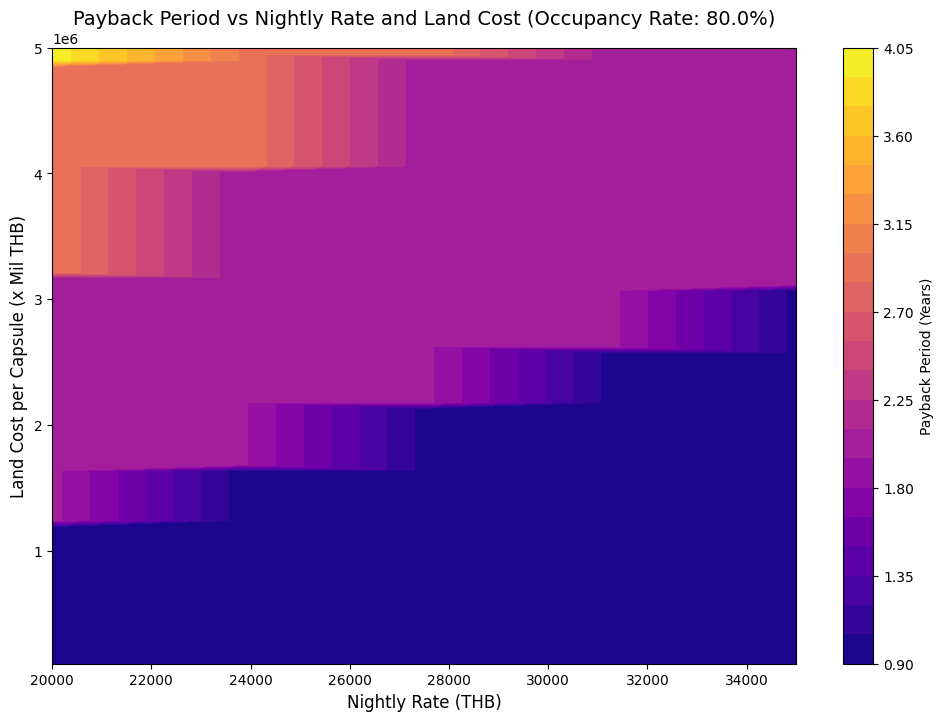

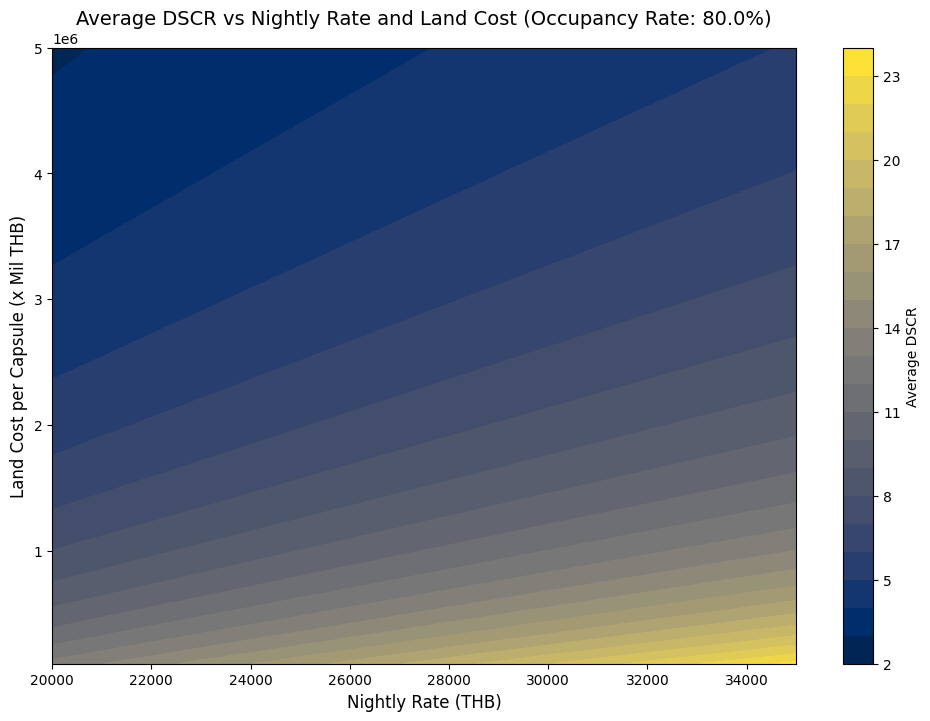

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

# Define capsule home data as an array
VL_E8_DATA = [1260000, 0, 1, 6]
VL_D8_DATA = [2527000, 1, 1, 6]
VL_E6_DATA = [1800000, 0, 1, 4]
VL_A2_5_8 = [411000, 0, 1, 4]
VL_A2_8_5 = [550000, 0, 1, 4]
VL_A2_11_5 = [680000, 0, 1, 6]
VL_A1_5_8 = [386000, 1, 0, 4]
VL_A1_8_5 = [520000, 1, 0, 4]
VL_A1_11_5 = [654000, 1, 0, 6]
VL_N1 = [272000, 0.5, 0, 0]
VL_D1 = [3000000, 1, 0, 8]
VL_D2 = [1000000, 1, 0, 0]
VL_QQ = [444000, 1, 0, 0]
VL_M1 = [234000, 1, 0, 0]

Import_Shipping_Costs = [41000, 170000]
COST_PER_FUNDATION_PILING = 25000

# Function to calculate total shipping and foundation costs for a product
def calculate_shipping_and_piling_cost(product_data):
    exw_price, standard_containers, flat_rack_containers, pilings = product_data
    standard_shipping_cost = standard_containers * Import_Shipping_Costs[0]
    flat_rack_shipping_cost = flat_rack_containers * Import_Shipping_Costs[1]
    piling_cost = pilings * COST_PER_FUNDATION_PILING
    total_shipping_cost = standard_shipping_cost + flat_rack_shipping_cost
    return {
        "exw_price": exw_price,
        "shipping_cost": total_shipping_cost,
        "piling_cost": piling_cost,
        "total_cost": exw_price + total_shipping_cost + piling_cost
    }

# Process all products
products = {
    "VL_E8": VL_E8_DATA,
    "VL_D8": VL_D8_DATA,
    "VL_E6": VL_E6_DATA,
    "VL_A2_5_8": VL_A2_5_8,
    "VL_A2_8_5": VL_A2_8_5,
    "VL_A2_11_5": VL_A2_11_5,
    "VL_A1_5_8": VL_A1_5_8,
    "VL_A1_8_5": VL_A1_8_5,
    "VL_A1_11_5": VL_A1_11_5,
    "VL_N1": VL_N1,
    "VL_D1": VL_D1,
    "VL_D2": VL_D2,
    "VL_QQ": VL_QQ,
    "VL_M1": VL_M1
}

results = {}
for product_name, product_data in products.items():
    results[product_name] = calculate_shipping_and_piling_cost(product_data)

# Convert results into a DataFrame
df_shipping_costs = pd.DataFrame.from_dict(results, orient='index')
df_shipping_costs.index.name = "Product"
df_shipping_costs.reset_index(inplace=True)

# Display the shipping and piling cost summary
display(df_shipping_costs)





# Financial and loan calculations (integrated from the existing code)
NIGHTLY_RATE_RANGE = np.linspace(20000, 35000, 5)  # THB, nightly rental rate range
OCCUPANCY_RATES = [0.4, 0.6, 0.8]  # Occupancy rates to analyze
DAYS_PER_YEAR = 365  # Number of days in a year
LAND_COSTS = np.linspace(100_000, 5_000_000, 100)  # THB, land cost per capsule
OPERATING_COST_RATE = 0.40  # 40% of revenue as operating costs
DEPRECIATION_YEARS = 20  # Depreciation period in years
TAX_RATE = 0.20  # 20% tax rate
LOAN_INTEREST_RATE = 0.15  # 15% annual loan interest rate
LOAN_TERM_YEARS = 10  # Loan term in years
DISCOUNT_RATE = 0.08  # 8% discount rate for NPV calculation
MAX_YEARS = 30  # Maximum time horizon for payoffs


# Function to calculate loan amount
def calculate_loan_amount(land_cost):
    """
    Calculate the total loan amount, including EXW price from VL_E8_DATA and land cost.
    """
    exw_price = VL_E8_DATA[0]  # Extract EXW price from the data structure
    return exw_price + land_cost

# Function to calculate annual loan payments (annuity formula)
def calculate_loan_payment(principal, annual_interest_rate, years):
    monthly_rate = annual_interest_rate / 12
    n_payments = years * 12
    payment = principal * monthly_rate / (1 - (1 + monthly_rate) ** -n_payments)
    return payment * 12  # Return annual payment

# Function to generate an amortization schedule
def amortization_schedule(principal, annual_interest_rate, years):
    schedule = []
    annual_payment = calculate_loan_payment(principal, annual_interest_rate, years)
    remaining_balance = principal

    for year in range(1, years + 1):
        annual_interest = remaining_balance * annual_interest_rate
        principal_payment = annual_payment - annual_interest
        remaining_balance -= principal_payment
        schedule.append({
            "year": year,
            "annual_payment": annual_payment,
            "interest": annual_interest,
            "principal_payment": principal_payment,
            "remaining_balance": max(0, remaining_balance)
        })

    return schedule

# Function to calculate financials
def calculate_financials(nightly_rate, occupancy_rate, land_cost):
    loan_amount = calculate_loan_amount(land_cost)  # Include EXW price in loan
    annual_revenue = nightly_rate * occupancy_rate * DAYS_PER_YEAR
    operating_costs = annual_revenue * OPERATING_COST_RATE
    depreciation = VL_E8_DATA[0] / DEPRECIATION_YEARS  # Depreciation based on EXW price
    loan_schedule = amortization_schedule(loan_amount, LOAN_INTEREST_RATE, LOAN_TERM_YEARS)

    financials = []
    for year in range(1, MAX_YEARS + 1):
        if year <= DEPRECIATION_YEARS:
            current_depreciation = depreciation
        else:
            current_depreciation = 0

        if year <= LOAN_TERM_YEARS:
            interest_payment = loan_schedule[year - 1]['interest']
            principal_payment = loan_schedule[year - 1]['principal_payment']
            debt_service = interest_payment + principal_payment
        else:
            interest_payment = 0
            principal_payment = 0
            debt_service = 0

        net_operating_income = annual_revenue - operating_costs
        dscr = net_operating_income / debt_service if debt_service > 0 else np.inf

        taxable_income = annual_revenue - operating_costs - current_depreciation - interest_payment
        tax_payment = max(0, taxable_income * TAX_RATE)
        net_income = taxable_income - tax_payment

        financials.append({
            "year": year,
            "annual_revenue": annual_revenue,
            "operating_costs": operating_costs,
            "depreciation": current_depreciation,
            "interest_payment": interest_payment,
            "principal_payment": principal_payment,
            "debt_service": debt_service,
            "net_operating_income": net_operating_income,
            "dscr": dscr,
            "tax_payment": tax_payment,
            "net_income": net_income
        })

    return financials

# Function to calculate NPV and ROI
def calculate_npv_roi(financials):
    cash_flows = [year_data['net_income'] for year_data in financials]
    npv = sum([cf / (1 + DISCOUNT_RATE) ** t for t, cf in enumerate(cash_flows, start=1)])
    roi = (sum(cash_flows) / financials[0]['annual_revenue']) * 100
    return npv, roi

# Function to calculate payback period
def calculate_payback_period(financials, total_investment):
    cumulative_cash_flow = 0
    for year_data in financials:
        cumulative_cash_flow += year_data['net_income']
        if cumulative_cash_flow >= total_investment:
            return year_data['year']
    return np.inf

# Calculate results for each combination of occupancy rate, nightly rate, and land cost
results = []
for occupancy_rate in OCCUPANCY_RATES:
    for nightly_rate in NIGHTLY_RATE_RANGE:
        for land_cost in LAND_COSTS:
            total_investment = calculate_loan_amount(land_cost)
            financials = calculate_financials(nightly_rate, occupancy_rate, land_cost)
            npv, roi = calculate_npv_roi(financials)
            payback_period = calculate_payback_period(financials, total_investment)
            average_dscr = np.mean([year['dscr'] for year in financials if year['debt_service'] > 0])
            results.append({
                'occupancy_rate': occupancy_rate,
                'nightly_rate': nightly_rate,
                'land_cost': land_cost,
                'npv': npv,
                'roi': roi,
                'payback_period': payback_period,
                'average_dscr': average_dscr
            })

# Convert results into a DataFrame
df = pd.DataFrame(results)

# Function to create 2D contour plots with corrected ranges and NaN handling
def plot_2d_contour(x, y, z, z_label, title, cmap='viridis'):
    # Remove NaN or Inf values before plotting
    mask = ~np.isnan(z) & ~np.isinf(z)
    x = x[mask]
    y = y[mask]
    z = z[mask]

    if len(z) > 0:
        fig, ax = plt.subplots(figsize=(12, 8))
        # Create a contour plot
        contour = ax.tricontourf(x, y, z, levels=20, cmap=cmap)
        fig.colorbar(contour, ax=ax, label=z_label)

        ax.set_xlabel('Nightly Rate (THB)', fontsize=12)
        ax.set_ylabel('Land Cost per Capsule (x Mil THB)', fontsize=12)
        ax.set_title(title, fontsize=14)

        plt.show()
    else:
        print(f"No valid data points to plot for {title}")

# Prepare data for plotting
for occupancy_rate in OCCUPANCY_RATES:
    filtered_df = df[df['occupancy_rate'] == occupancy_rate]

    X = np.array(filtered_df['nightly_rate'])
    Y = np.array(filtered_df['land_cost'])

    # Plot NPV
    Z_npv = np.array(filtered_df['npv'])
    plot_2d_contour(X, Y, Z_npv, 'NPV (THB)',
                    f'NPV vs Nightly Rate and Land Cost (Occupancy Rate: {occupancy_rate * 100}%)')

    # Plot ROI
    Z_roi = np.array(filtered_df['roi'])
    plot_2d_contour(X, Y, Z_roi, 'ROI (%)',
                    f'ROI vs Nightly Rate and Land Cost (Occupancy Rate: {occupancy_rate * 100}%)',
                    cmap='coolwarm')

    # Plot Payback Period
    Z_payback = np.array(filtered_df['payback_period'])
    plot_2d_contour(X, Y, Z_payback, 'Payback Period (Years)',
                    f'Payback Period vs Nightly Rate and Land Cost (Occupancy Rate: {occupancy_rate * 100}%)',
                    cmap='plasma')
    # Plot DSCR
    Z_dscr = np.array(filtered_df['average_dscr'])
    plot_2d_contour(X, Y, Z_dscr, 'Average DSCR',
                    f'Average DSCR vs Nightly Rate and Land Cost (Occupancy Rate: {occupancy_rate * 100}%)',
                    cmap='cividis')

